# Task 2 with Augementation

#### Import Tensor Flow

In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tfc
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import cv2
from random import randint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

#### Define Methods

In [2]:
def evaluate(testGenerator, testModel):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = testModel.evaluate(testGenerator, verbose=2) 
    print("ACCURACY: " + str(test_acc))

def resizeAndShift(width_shift_val, height_shift_val, xDataSet, yDataset, label):
    datagen = ImageDataGenerator(width_shift_range=width_shift_val, height_shift_range=height_shift_val, fill_mode='nearest', rescale=1./255)
    
    new_shape = (56,56)
    returnDataSet = np.zeros(shape=(xDataSet.shape[0],)+new_shape)
    for idx in range(xDataSet.shape[0]):
        returnDataSet[idx][14: 14 + 28, 14: 14 + 28] = xDataSet[idx]

    returnDataSet = returnDataSet.reshape(returnDataSet.shape[0], 56, 56, 1)
    datagen.fit(returnDataSet)
    
    # define number of rows & columns
    num_row = 2
    num_col = 8
    num= num_row*num_col

    # plot before
    print(label + ' BEFORE:\n')
    fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes1[i//num_col, i%num_col]
         ax.imshow(returnDataSet[i], cmap='gray_r')
         ax.set_title('Label: {}'.format(yDataset[i]))
    plt.tight_layout()
    plt.show()

    # plot after
    print(label + ' AFTER:\n')
    fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    generator = datagen.flow(
        returnDataSet,
        yDataset,
        batch_size=num,
        shuffle=False)
        
    for X, Y in generator:
         for i in range(0, num):
              ax = axes2[i//num_col, i%num_col]
              ax.imshow(X[i].reshape(56,56), cmap='gray_r')
              ax.set_title('Label: {}'.format(int(Y[i])))
         break
    plt.tight_layout()
    plt.show()
    return generator

def augment(rotationAngleRange, zoomRange, shiftx, shifty, xDataSet, yDataset, label):
    datagen = ImageDataGenerator(rotation_range=rotationAngleRange,zoom_range=zoomRange,
                                width_shift_range=shiftx, height_shift_range=shifty,
                                fill_mode='nearest', rescale=1./255)

    new_shape = (56,56)
    returnDataSet = np.zeros(shape=(xDataSet.shape[0],)+new_shape)
    for idx in range(xDataSet.shape[0]):
        returnDataSet[idx][14: 14 + 28, 14: 14 + 28] = xDataSet[idx]

    returnDataSet = returnDataSet.reshape(returnDataSet.shape[0], 56, 56, 1)
    datagen.fit(returnDataSet)
    
    # define number of rows & columns
    num_row = 2
    num_col = 8
    num= num_row*num_col

    # plot before
    print(label + ' BEFORE:\n')
    fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes1[i//num_col, i%num_col]
         ax.imshow(returnDataSet[i], cmap='gray_r')
         ax.set_title('Label: {}'.format(yDataset[i]))
    plt.tight_layout()
    plt.show()

   # plot after
    print(label + ' AFTER:\n')
    fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    generator = datagen.flow(
        returnDataSet,
        yDataset,
        batch_size=num,
        shuffle=False)
        
    for X, Y in generator:
        for i in range(0, num):
              ax = axes2[i//num_col, i%num_col]
              ax.imshow(X[i].reshape(56,56), cmap='gray_r')
              ax.set_title('Label: {}'.format(int(Y[i])))
        break
    plt.tight_layout()
    plt.show()
    return generator

#### Load MNIST Dataset

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#### Building a Training Pipeline

TRAIN BEFORE:



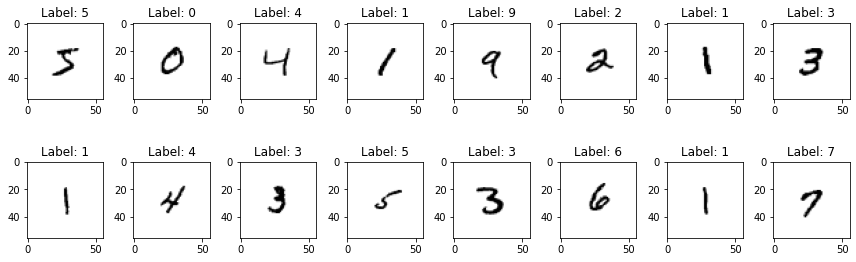

TRAIN AFTER:



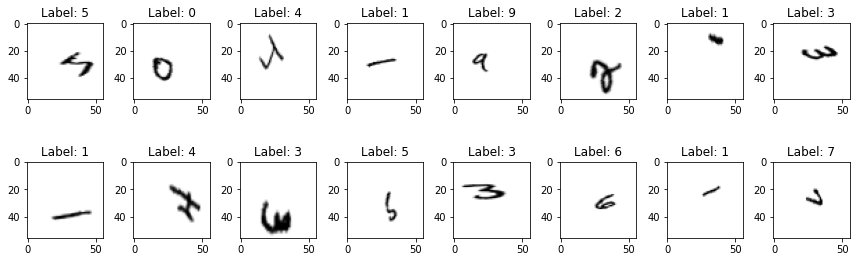

In [4]:
train_generator = augment(100, [0.5,2], 0.25, 0.25, train_images, train_labels, "TRAIN")

#### Building an Evaluation Pipeline

TEST BEFORE:



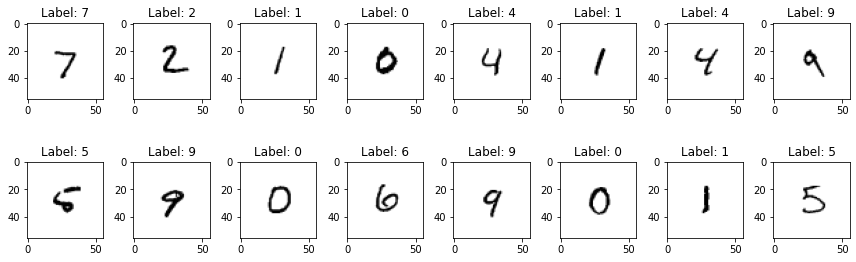

TEST AFTER:



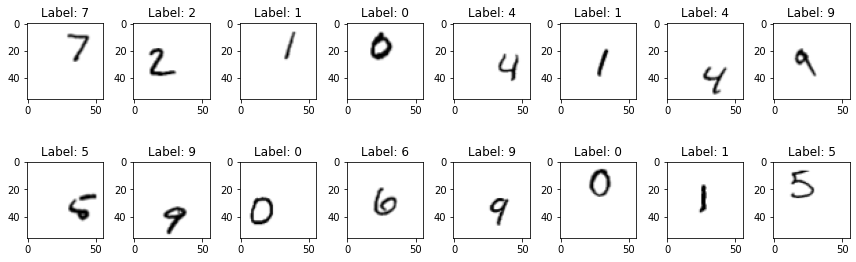

In [5]:
test_generator = resizeAndShift(0.25, 0.25, test_images, test_labels, "TEST")

#### Create and Train the Model

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_generator,epochs=5,validation_data=test_generator,batch_size=16)

Epoch 1/5
3750/3750 [==============================] - 22s 5ms/step - loss: 1.3736 - accuracy: 0.5139 - val_loss: 0.4643 - val_accuracy: 0.8621
Epoch 2/5
3750/3750 [==============================] - 19s 5ms/step - loss: 0.6329 - accuracy: 0.7961 - val_loss: 0.2939 - val_accuracy: 0.9082
Epoch 3/5
3750/3750 [==============================] - 21s 6ms/step - loss: 0.4948 - accuracy: 0.8446 - val_loss: 0.2252 - val_accuracy: 0.9303
Epoch 4/5
3750/3750 [==============================] - 19s 5ms/step - loss: 0.4301 - accuracy: 0.8637 - val_loss: 0.2141 - val_accuracy: 0.9335
Epoch 5/5
3750/3750 [==============================] - 20s 5ms/step - loss: 0.3836 - accuracy: 0.8776 - val_loss: 0.2007 - val_accuracy: 0.9373


#### Evaluate the Model

625/625 - 2s - loss: 0.2064 - accuracy: 0.9382
ACCURACY: 0.9381999969482422


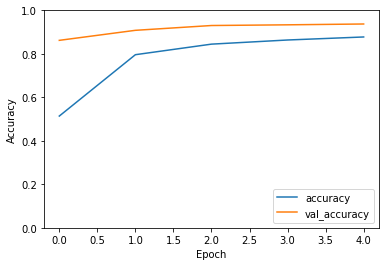

In [7]:
evaluate(test_generator, model)